# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
# url = "api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}".format(weather_api_key = weather_api_key)
cities_pd = pd.DataFrame(columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", 
                                    "Cloudiness", "Wind Speed", "Country", "Date"], index = cities)
cities_pd.index.name = "City"

for x in range(len(cities)):
        url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[x]}&appid={weather_api_key}"
        response = requests.get(url)
        data = response.json()
        # if response.status_code == 200:
        try:
            #cities_pd.loc[cities[x]] = [cities[x], "City": cities[x], "Lat": data['coord']['lat'],
                             # "Lng": data['coord']['lon'], "Max Temp": data['main']['temp_max'],
                              #"Humidity": data['main']['humidity'], "Cloudiness": data['clouds']['all'],
                              #"Wind Speed": data['wind']['speed'], "Country": data['sys']['country'],
                              #"Date": data['dt']}, ignore_index= True)
            cities_pd.loc[cities[x]] = [cities[x], data['coord']['lat'],
                              data['coord']['lon'], data['main']['temp_max'],
                              data['main']['humidity'], data['clouds']['all'],
                              data['wind']['speed'], data['sys']['country'],
                              data['dt']]
            print (f"Processing City #{x + 1}. City Name: {cities[x]}")
        #else:
        except:
            cities_pd = cities_pd.drop(index = cities[x])
            print ("City information unavailable. Skipping...")

Processing City #1. City Name: rikitea
Processing City #2. City Name: kapaa
Processing City #3. City Name: tanggu
Processing City #4. City Name: turukhansk
City information unavailable. Skipping...
Processing City #6. City Name: ushuaia
Processing City #7. City Name: saskylakh
Processing City #8. City Name: hallein
Processing City #9. City Name: kodiak
Processing City #10. City Name: port moresby
Processing City #11. City Name: darhan
Processing City #12. City Name: srednekolymsk
Processing City #13. City Name: katsuura
Processing City #14. City Name: narsaq
Processing City #15. City Name: albany
Processing City #16. City Name: busselton
City information unavailable. Skipping...
Processing City #18. City Name: oranjemund
Processing City #19. City Name: cape town
Processing City #20. City Name: punta arenas
Processing City #21. City Name: beitbridge
Processing City #22. City Name: raudeberg
City information unavailable. Skipping...
Processing City #24. City Name: medicine hat
Processing

Processing City #197. City Name: fare
Processing City #198. City Name: buala
Processing City #199. City Name: marion
Processing City #200. City Name: vila velha
Processing City #201. City Name: bardiyah
Processing City #202. City Name: miri
Processing City #203. City Name: pout
Processing City #204. City Name: akcakoca
Processing City #205. City Name: san cristobal
Processing City #206. City Name: octeville
City information unavailable. Skipping...
Processing City #208. City Name: jibuti
Processing City #209. City Name: coihaique
Processing City #210. City Name: ust-nera
Processing City #211. City Name: kamir
Processing City #212. City Name: scottsboro
Processing City #213. City Name: powell
Processing City #214. City Name: westport
Processing City #215. City Name: conde
Processing City #216. City Name: filadelfia
City information unavailable. Skipping...
Processing City #218. City Name: ko samui
Processing City #219. City Name: beringovskiy
Processing City #220. City Name: seoul
Proce

Processing City #393. City Name: skelleftea
City information unavailable. Skipping...
Processing City #395. City Name: sangar
Processing City #396. City Name: ossora
Processing City #397. City Name: borovoy
Processing City #398. City Name: waipawa
City information unavailable. Skipping...
Processing City #400. City Name: tamale
Processing City #401. City Name: chimbote
Processing City #402. City Name: saint augustine
Processing City #403. City Name: nishihara
Processing City #404. City Name: bengkulu
Processing City #405. City Name: krasnogorsk
Processing City #406. City Name: khonsa
Processing City #407. City Name: matara
Processing City #408. City Name: morehead
Processing City #409. City Name: pallasovka
Processing City #410. City Name: kushiro
Processing City #411. City Name: mocuba
Processing City #412. City Name: minab
Processing City #413. City Name: nanae
Processing City #414. City Name: komsomolskiy
Processing City #415. City Name: shubarshi
Processing City #416. City Name: he

Processing City #587. City Name: bowen
Processing City #588. City Name: akdepe
Processing City #589. City Name: guangyuan
Processing City #590. City Name: ola
Processing City #591. City Name: summerside
Processing City #592. City Name: dudinka
Processing City #593. City Name: aanekoski
Processing City #594. City Name: roald
Processing City #595. City Name: kroya
Processing City #596. City Name: cuamba
Processing City #597. City Name: souillac
Processing City #598. City Name: nuoro
Processing City #599. City Name: kolpny
Processing City #600. City Name: keta
Processing City #601. City Name: tamandare
Processing City #602. City Name: qui nhon
Processing City #603. City Name: tocopilla
City information unavailable. Skipping...
Processing City #605. City Name: sao felipe
Processing City #606. City Name: synya
Processing City #607. City Name: asfi
Processing City #608. City Name: spearfish
Processing City #609. City Name: bintulu
Processing City #610. City Name: sirjan
Processing City #611.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
cities_pd.to_csv("Weather_Output_Final.csv")

In [85]:
cities_pd = cities_pd.reset_index(drop = True)
cities_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,296.16,84,100,5.68,PF,1595017856
1,kapaa,22.08,-159.32,303.71,78,40,3.1,US,1595017857
2,tanggu,39.02,117.65,298.15,83,83,1,CN,1595017857
3,turukhansk,65.82,87.98,280.03,93,35,3.26,RU,1595017857
4,ushuaia,-54.8,-68.3,271.15,92,53,2.1,AR,1595017858
...,...,...,...,...,...,...,...,...,...
587,nalut,30.33,10.85,303.19,39,0,7.85,LY,1595018016
588,labuhan,-6.88,112.21,297.55,83,9,5.29,ID,1595018016
589,deputatskiy,69.3,139.9,279.68,66,56,3.27,RU,1595018016
590,orange cove,36.62,-119.31,306.48,31,1,1.78,US,1595018017


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
cities_pd = cities_pd.reset_index(drop = True)
cities_pd.drop(columns = ["City", "Country", "Date"]).astype(float).describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,22.171115,21.246774,293.856182,71.858108,47.611486,3.493294
std,32.761439,90.953302,8.135416,21.119116,38.427479,2.333291
min,-54.800000,-179.170000,271.150000,9.000000,0.000000,0.220000
25%,-5.225000,-59.627500,287.545000,62.000000,5.000000,1.787500
50%,28.300000,27.070000,295.105000,77.000000,40.000000,3.100000
75%,49.622500,103.025000,299.582500,87.250000,89.250000,4.600000
max,78.220000,179.320000,313.710000,100.000000,100.000000,15.050000


In [92]:
#  Get the indices of cities that have humidity over 100%.
excess_humidity = cities_pd[cities_pd["Humidity"] > 100].index.tolist()
excess_humidity

[]

In [93]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,296.16,84,100,5.68,PF,1595017856
1,kapaa,22.08,-159.32,303.71,78,40,3.1,US,1595017857
2,tanggu,39.02,117.65,298.15,83,83,1,CN,1595017857
3,turukhansk,65.82,87.98,280.03,93,35,3.26,RU,1595017857
4,ushuaia,-54.8,-68.3,271.15,92,53,2.1,AR,1595017858
...,...,...,...,...,...,...,...,...,...
587,nalut,30.33,10.85,303.19,39,0,7.85,LY,1595018016
588,labuhan,-6.88,112.21,297.55,83,9,5.29,ID,1595018016
589,deputatskiy,69.3,139.9,279.68,66,56,3.27,RU,1595018016
590,orange cove,36.62,-119.31,306.48,31,1,1.78,US,1595018017


In [96]:
# Extract relevant fields from the data frame
clean_city_data = cities_pd.drop(columns = ["City", "Lng", "Country", "Date"])


# Export the City_Data into a csv
clean_city_data.to_csv("Weather_Output_Plot_Data.csv")
clean_city_data

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,-23.12,296.16,84,100,5.68
1,22.08,303.71,78,40,3.1
2,39.02,298.15,83,83,1
3,65.82,280.03,93,35,3.26
4,-54.8,271.15,92,53,2.1
...,...,...,...,...,...
587,30.33,303.19,39,0,7.85
588,-6.88,297.55,83,9,5.29
589,69.3,279.68,66,56,3.27
590,36.62,306.48,31,1,1.78


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

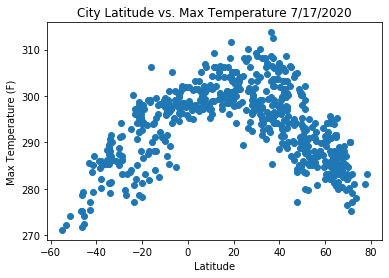

In [98]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature 7/17/2020")
plt.show()

## Latitude vs. Humidity Plot

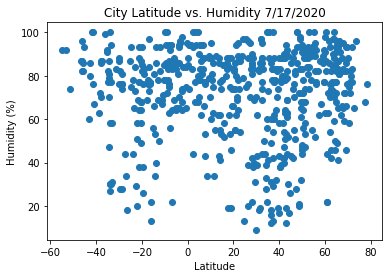

In [99]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 7/17/2020")
plt.show()

## Latitude vs. Cloudiness Plot

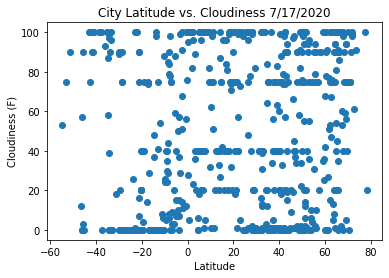

In [100]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (F)')
plt.title("City Latitude vs. Cloudiness 7/17/2020")
plt.show()

## Latitude vs. Wind Speed Plot

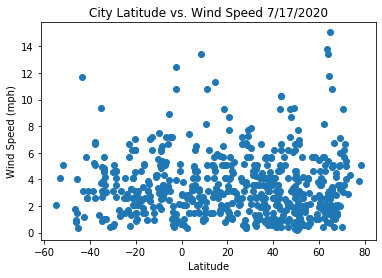

In [101]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 7/17/2020")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


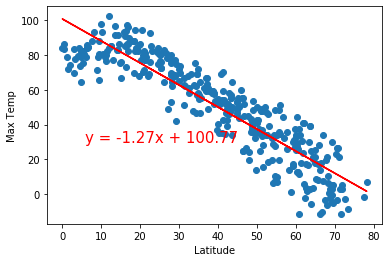

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


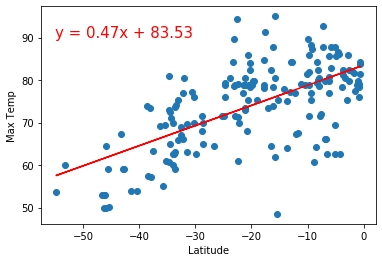

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


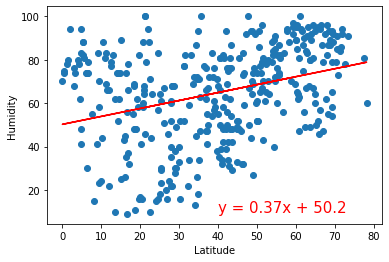

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


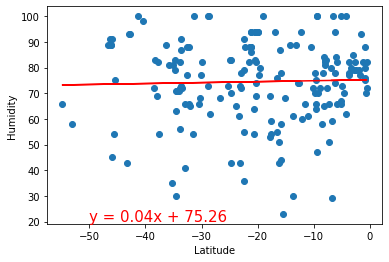

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


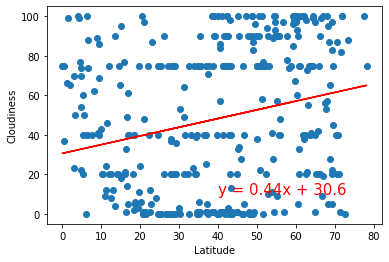

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


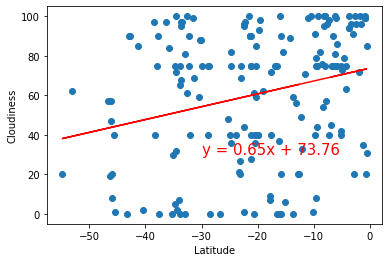

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


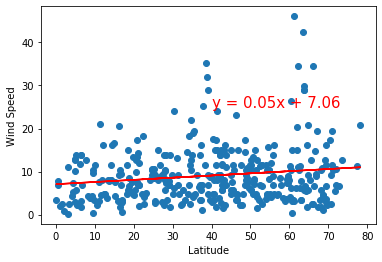

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


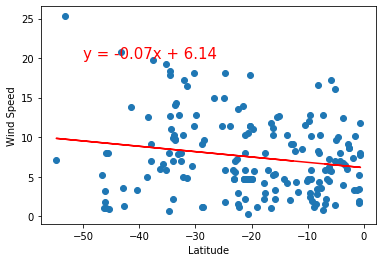